In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
train.dtypes

ID                        int64
Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [5]:
train.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [6]:
# train.drop(['ID','Claim','Gender'],axis=1,inplace=True)

In [7]:
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [8]:
train['Claim'].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

In [9]:
train.drop(['Gender'],axis=1,inplace= True)

In [10]:
train = pd.get_dummies(train)

In [11]:
X = train.drop(['Claim'],axis=1)
cols = X.columns
y= train['Claim']

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [13]:
rus = RandomUnderSampler(random_state=42)

In [14]:
X_res, y_res = rus.fit_resample(X, y)

In [15]:
X_res = pd.DataFrame(X_res,columns=cols)
X_res.drop(['ID'],axis=1,inplace= True)

In [16]:
pd.Series(y_res).value_counts()

1    741
0    741
dtype: int64

In [17]:
X_res

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,94.0,20.00,0.00,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.0,10.00,0.00,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44.0,26.00,0.00,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,237.0,27.00,0.00,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,124.0,28.00,0.00,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,13.50,3.38,66.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,50.0,6.56,1.84,48.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,89.0,42.00,0.00,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,24.0,93.00,0.00,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,3.0,18.50,4.63,25.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# X_res = pd.get_dummies(X_res, columns=['Agency','Agency Type','Distribution Channel','Product Name','Destination'])
X_res.dtypes

Duration                                    float64
Net Sales                                   float64
Commision (in value)                        float64
Age                                         float64
Agency_ADM                                  float64
Agency_ART                                  float64
Agency_C2B                                  float64
Agency_CBH                                  float64
Agency_CCR                                  float64
Agency_CSR                                  float64
Agency_CWT                                  float64
Agency_EPX                                  float64
Agency_JWT                                  float64
Agency_JZI                                  float64
Agency_KML                                  float64
Agency_LWC                                  float64
Agency_RAB                                  float64
Agency_SSI                                  float64
Agency_TST                                  float64
Agency_TTW  

In [19]:
X_res.shape

(1482, 151)

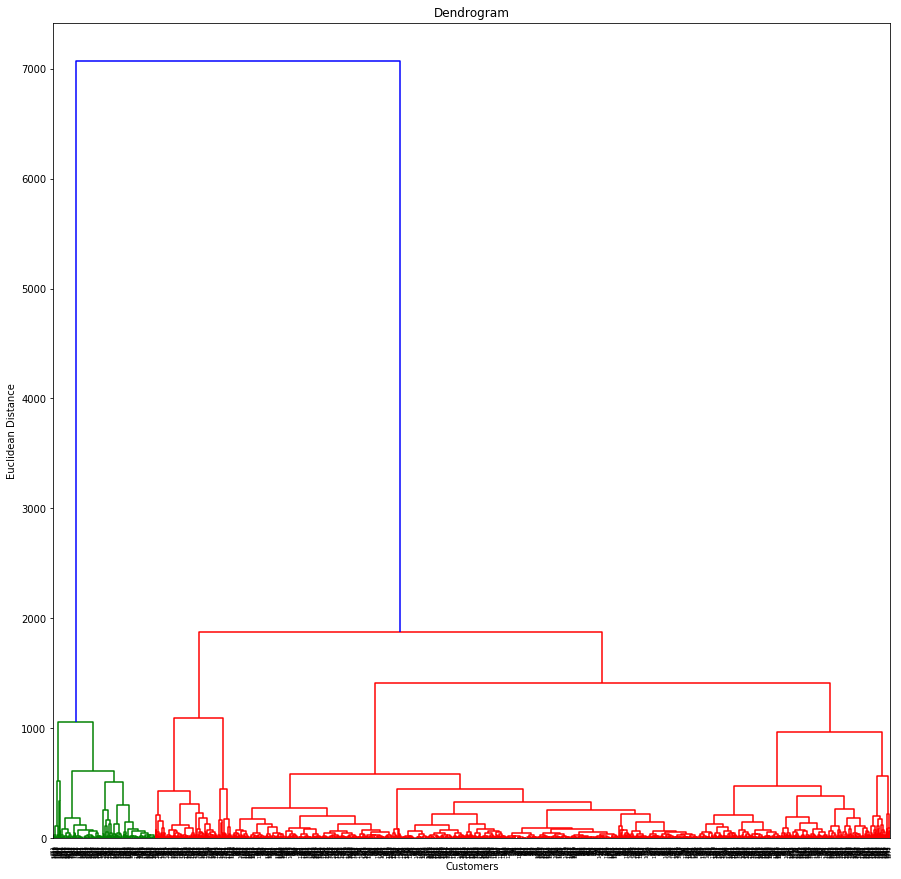

In [20]:
plt.figure(figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(X_res, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)

In [23]:
y_kmeans = kmeans.fit_predict(X_res)

In [24]:
y_kmeans

array([1, 1, 1, ..., 0, 1, 0])

In [25]:
accuracy_score(y_res,y_kmeans)

0.4008097165991903

In [26]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
y_agg = agg.fit_predict(X_res)

In [27]:
accuracy_score(y_res,y_agg)

0.5951417004048583